<a href="https://colab.research.google.com/github/jperdomos/Ejercicios/blob/main/Ejercicio_en_clase_jueves_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GRÁFICO DE x(t)=$8cos(100t)$+$10sen(20t)$-$7cos(300t-π/7)$

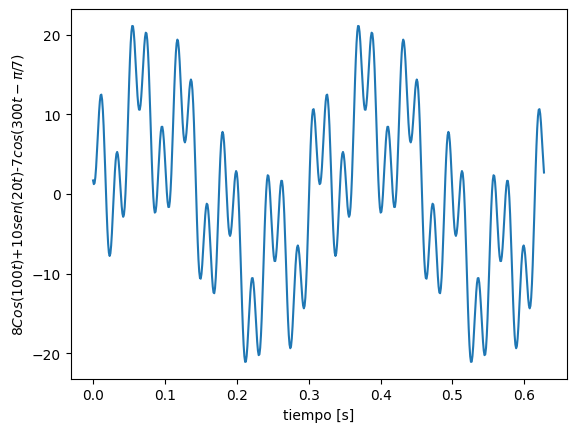

[2.70059364e+00 2.64559246e+00 2.66069477e+00 2.74548987e+00
 2.89185994e+00 3.08479815e+00 3.30391034e+00 3.52545328e+00
 3.72470915e+00 3.87846355e+00 3.96734362e+00 3.97778679e+00
 3.90344659e+00 3.74589702e+00 3.51456564e+00 3.22590103e+00
 2.90185494e+00 2.56782683e+00 2.25027102e+00 1.97419940e+00
 1.76082340e+00 1.62556489e+00 1.57662981e+00 1.61428316e+00
 1.73089554e+00 1.91175586e+00 2.13656988e+00 2.38149724e+00
 2.62152720e+00 2.83295971e+00 2.99574899e+00 3.09547961e+00
 3.12478168e+00 3.08404644e+00 2.98137235e+00 2.83174711e+00
 2.65554585e+00 2.47649299e+00 2.31928772e+00 2.20712599e+00
 2.15936241e+00 2.18954152e+00 2.30399197e+00 2.50112218e+00
 2.77148719e+00 3.09862134e+00 3.46055600e+00 3.83187507e+00
 4.18610788e+00 4.49822647e+00 4.74700358e+00 4.91700181e+00
 5.00000000e+00 4.99571820e+00 4.91177116e+00 4.76285565e+00
 4.56925191e+00 4.35478659e+00 4.14445709e+00 3.96195042e+00
 3.82729967e+00 3.75490792e+00 3.75213309e+00 3.81857229e+00
 3.94611579e+00 4.119764

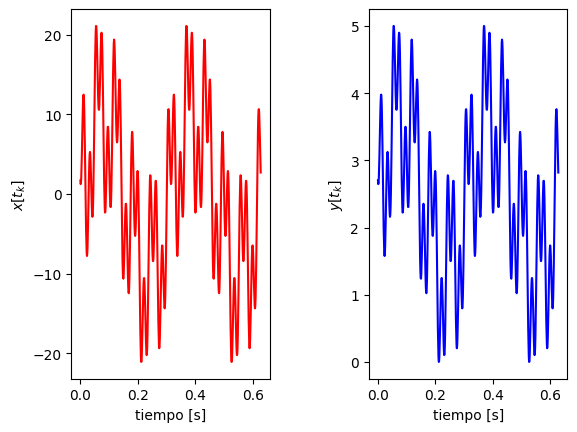

2.6455924556723365 4 2.857142857142857


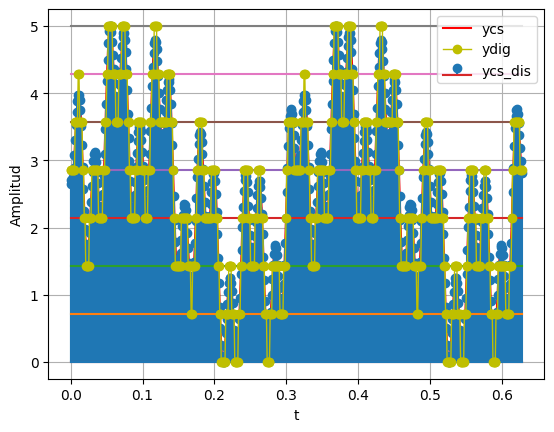

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

#SEÑAL ORIGINAL

T_s = (2*np.pi/300)/20 # número de muestras
T_o = np.pi/5 # periodo función sin
A0 = 8 # amplitud 0
A1 = 10 #amplitud 1
A2= 7 #amplitud 2
ti = 0 #tiempo inicial
tf = T_o #tiempo final
tv = np.arange(0,T_o,T_s)
xv = A0*np.cos(100*tv)+A1*np.sin(20*tv)-A2*np.cos((300*tv)-np.pi/7) #vector de amplitud

plt.plot(tv,xv)
plt.xlabel('tiempo [s]')
plt.ylabel('$8Cos(100t)$+$10sen(20t)$-$7cos(300t-\pi / 7)$')
plt.show()

#CERO Y PENDIENTE

def my_ceropen(xv,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto
  xmax = max(xv) # x.max()
  xmin = min(xv) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*xv + c
  return yv

yv = my_ceropen(xv,ymin=0,ymax=5)
print(yv)
print(yv.shape)

plt.subplot(121)
plt.plot(tv,xv,'r')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

plt.subplot(122)
plt.plot(tv,yv,'b')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')
plt.subplots_adjust(hspace=0.5,wspace=0.5) #ajustar espaciado entre gráficas
plt.show()



nbits = 3
rmin = 0
rmax = 5
ve = np.linspace(rmin,rmax,2**nbits)

#distancias y cero pendiente a vector cuantizacion
d = cdist(yv.reshape(-1,1),ve.reshape(-1,1))
d.shape

ind = np.argmin(d,axis=1)
ind

print(yv[1],ind[1],ve[ind[1]])



def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

for i in range(yv.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(yv[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(yv[i],ve)) #apilar datos cuantizando si i>0


plt.plot(tv,yv,c='r', label='ycs')#cs continua

plt.stem(tv,yv, label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=1)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()